<a href="https://colab.research.google.com/github/kunalrajsingh/VGG19/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
import glob
import os
directory=pathlib.Path("/content/drive/MyDrive/Objects")
resultant="/content/augmentedimages"
items = os.listdir(directory)
classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images)
labels = np.array(labels)

glass.jpg
Glass with jug.jpg
Light house.jpg
watch.jpg
key.jpg
Spectacles.jpg
soft drink.jpg
boys bangels.jpg
cycle.jpg


In [ ]:
images.shape

(109, 224, 224, 3)

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications.vgg19 import VGG19, preprocess_input

model = VGG19(weights="imagenet")
for i in model.layers:
    i.trainable =  False

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [ ]:
len(model.layers)

26

In [ ]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 143,667,240 (548.05 MB)

In [ ]:
transferVGG = Sequential()
for i in range(13):
    transferVGG.add(model.layers[i])
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(25,activation="softmax"))

transferVGG.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     205,521,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,096,025 (797.64 MB)

 Trainable params: 205,590,297 (784.26 MB)

 Non-trainable params: 3,505,728 (13.37 MB)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images,labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.1008 - loss: 86227.0625 call
4/4 ━━━━━━━━━━━━━━━━━━━━ 71s 16s/step - accuracy: 0.1082 - loss: 96027.2266
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.4456 - loss: 104743.3203 call
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 15s/step - accuracy: 0.4702 - loss: 99530.3359
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8927 - loss: 7389.6318 call
4/4 ━━━━━━━━━━━━━━━━━━━━ 90s 16s/step - accuracy: 0.8940 - loss: 7642.6719
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.9912 - loss: 1907.9412 call

Reached 99.00% accuracy, so stopping training!!
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 15s/step - accuracy: 0.9911 - loss: 1923.9917


In [ ]:
transferVGG.evaluate(images,labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 59s 13s/step - accuracy: 0.9911 - loss: 394.6702


[407.84002685546875, 0.9908257126808167]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


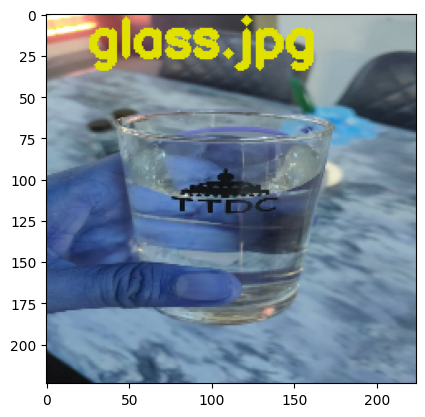

In [ ]:
def predict(i,transferVGG,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(transferVGG.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3)
    plt.imshow(img)
predict("glass.jpg",transferVGG,classes)